In [1]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 450kB 58.0MB/s 
     |████████████████████████████████| 3.8MB 68.7MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [2]:
!pip show tensorflow

Name: tensorflow
Version: 2.1.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: keras-preprocessing, termcolor, wheel, absl-py, astor, grpcio, numpy, opt-einsum, protobuf, scipy, gast, wrapt, six, tensorboard, google-pasta, tensorflow-estimator, keras-applications
Required-by: stable-baselines, magenta, fancyimpute


In [0]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [0]:
test=pd.read_csv('/content/drive/My Drive/test.csv')
train=pd.read_csv('/content/drive/My Drive/train.csv')

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [41]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [43]:
df_features = train.iloc[:, 1:785]
df_label = train.iloc[:, 0]

X_test = test.iloc[:, 0:784]

print(X_test.shape)

(28000, 784)


In [44]:
X_test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001357,0.012500,0.016786,0.031714,0.056000,0.100464,0.166929,...,3.272536,2.371464,1.454357,0.846286,0.509750,0.254750,0.062107,0.015250,0.000786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005429,0.024179,0.036250,0.083143,0.134107,0.201071,0.325000,0.366714,0.468143,0.589429,0.656964,0.569714,0.464214,0.323679,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.227093,1.566275,1.513515,2.674449,3.216234,4.549478,5.470524,...,25.211706,21.240003,16.643468,12.637953,9.963879,7.031504,3.040514,1.265562,0.131475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.640468,2.234963,2.493982,3.777711,4.946940,6.262819,7.714814,8.243535,8.974038,10.488695,11.209508,10.204173,9.402197,7.878854,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(df_features, df_label, 
                                                test_size = 0.2,
                                                random_state = 42)

X_train = X_train.as_matrix().reshape(33600, 784) 
X_valid = X_valid.as_matrix().reshape(8400, 784)

X_test = X_test.as_matrix().reshape(28000, 784)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [46]:
print((min(X_train[1]), max(X_train[1])))

(0, 254)


In [0]:
X_train = X_train.astype('float32')
X_valid= X_valid.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_valid /= 255
X_test /= 255

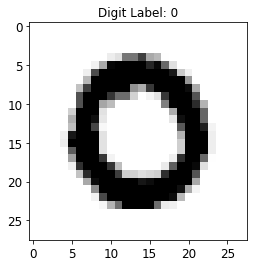

In [416]:
first_image = X_train_full.loc[1,:]
first_label = y_train_full[1]

# 784 columns correspond to 28x28 image
plottable_image = np.reshape(first_image.values, (28, 28))

# Plot the image
plt.imshow(plottable_image, cmap='gray_r')
plt.title('Digit Label: {}'.format(first_label))
plt.show()

In [0]:
import numpy as np
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

MODEL TEST

In [0]:
img_inputs = keras.Input(shape=(784))

In [50]:
img_inputs.shape

TensorShape([None, 784])

In [0]:
from tensorflow.keras import layers

In [0]:
flatten=layers.Flatten()
x=flatten(img_inputs)
x=layers.Dense(300, activation='relu')(x)
x=layers.Dense(100, activation='relu')(x)

In [0]:
outputs = layers.Dense(10, activation='softmax')(x)

In [0]:
model = keras.Model(inputs=img_inputs, outputs=outputs)

In [55]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer="sgd", metrics=[keras.metrics.sparse_categorical_accuracy])

In [33]:
%time history=model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid))

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 4s 129us/sample - loss: 0.7535 - sparse_categorical_accuracy: 0.8189 - val_loss: 0.3896 - val_sparse_categorical_accuracy: 0.8914
Epoch 2/30
33600/33600 [==============================] - 3s 82us/sample - loss: 0.3238 - sparse_categorical_accuracy: 0.9073 - val_loss: 0.3025 - val_sparse_categorical_accuracy: 0.9140
Epoch 3/30
33600/33600 [==============================] - 3s 78us/sample - loss: 0.2671 - sparse_categorical_accuracy: 0.9240 - val_loss: 0.2615 - val_sparse_categorical_accuracy: 0.9232
Epoch 4/30
33600/33600 [==============================] - 3s 79us/sample - loss: 0.2329 - sparse_categorical_accuracy: 0.9333 - val_loss: 0.2398 - val_sparse_categorical_accuracy: 0.9293
Epoch 5/30
33600/33600 [==============================] - 3s 79us/sample - loss: 0.2077 - sparse_categorical_accuracy: 0.9399 - val_loss: 0.2184 - val_sparse_categorical_accuracy: 0.9381
Epoch 6/30
3360

In [57]:
history.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 30,
 'metrics': ['loss',
  'sparse_categorical_accuracy',
  'val_loss',
  'val_sparse_categorical_accuracy'],
 'samples': 33600,
 'steps': 1050,
 'verbose': 0}

In [58]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [59]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

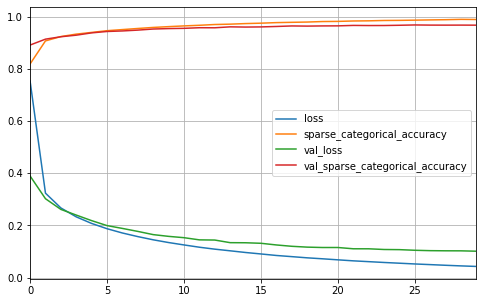

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [62]:
model.evaluate(X_train,y_train)

33600/33600 [==============================] - 2s 54us/sample - loss: 2.4364 - sparse_categorical_accuracy: 0.0792


[2.436372249239967, 0.07919643]

In [63]:
X_new=X_test[:10]
y_proba=model.predict(X_new)
y_proba.round(2)

array([[0.16, 0.17, 0.06, 0.08, 0.06, 0.19, 0.12, 0.02, 0.07, 0.06],
       [0.22, 0.16, 0.05, 0.04, 0.07, 0.15, 0.13, 0.04, 0.09, 0.05],
       [0.14, 0.13, 0.06, 0.07, 0.09, 0.13, 0.13, 0.08, 0.09, 0.08],
       [0.12, 0.14, 0.07, 0.09, 0.11, 0.12, 0.11, 0.05, 0.11, 0.09],
       [0.18, 0.13, 0.07, 0.08, 0.06, 0.16, 0.09, 0.07, 0.08, 0.07],
       [0.12, 0.14, 0.11, 0.08, 0.06, 0.14, 0.15, 0.06, 0.08, 0.05],
       [0.2 , 0.15, 0.05, 0.04, 0.06, 0.13, 0.14, 0.05, 0.1 , 0.07],
       [0.25, 0.16, 0.04, 0.06, 0.05, 0.16, 0.11, 0.04, 0.07, 0.05],
       [0.21, 0.18, 0.04, 0.04, 0.06, 0.14, 0.13, 0.04, 0.1 , 0.05],
       [0.17, 0.12, 0.07, 0.07, 0.07, 0.14, 0.11, 0.08, 0.1 , 0.07]],
      dtype=float32)

In [64]:
y_proba.round(2)[8]

array([0.21, 0.18, 0.04, 0.04, 0.06, 0.14, 0.13, 0.04, 0.1 , 0.05],
      dtype=float32)

In [0]:
y_pred=model.predict(X_test)

In [0]:
np.savetxt('y_pred.csv', y_pred, delimiter=',')

In [0]:
from google.colab import files

In [67]:
y_pred[4]

array([3.3185763e-08, 4.3932127e-05, 3.7131773e-04, 9.9945360e-01,
       3.3878397e-12, 8.2881546e-05, 3.6668985e-07, 2.7964879e-07,
       4.7484922e-05, 1.0335974e-08], dtype=float32)

In [0]:
pred=[]
for i in range(len(y_pred)):
  pred1=np.argmax(y_pred[i])
  pred.append(pred1)
  

In [69]:
for numb in range(0,10):
  print('number of',numb,pred.count(numb))

number of 0 2744
number of 1 3226
number of 2 2791
number of 3 2749
number of 4 2742
number of 5 2526
number of 6 2799
number of 7 2903
number of 8 2707
number of 9 2813


In [70]:
y_train

34941    6
24433    5
24432    3
8832     4
30291    7
        ..
6265     9
11284    9
38158    2
860      6
15795    0
Name: label, Length: 33600, dtype: int64

In [0]:
y_pred_new=np.asarray(pred)

In [72]:
y_pred_new

array([2, 0, 9, ..., 3, 9, 2])

MODEL #1

In [0]:
img_inputs = keras.Input(shape=(784))
flatten=layers.Flatten()
x=flatten(img_inputs)
x=layers.Dense(300, activation='relu')(x)
x=layers.Dense(300, activation='relu')(x)

In [0]:
outputs = layers.Dense(10, activation='softmax')(x)

In [0]:
model = keras.Model(inputs=img_inputs, outputs=outputs)

In [84]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer="sgd", metrics=[keras.metrics.sparse_categorical_accuracy])

In [86]:
%time history1=model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid))

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 3s 92us/sample - loss: 0.7862 - sparse_categorical_accuracy: 0.8103 - val_loss: 0.3926 - val_sparse_categorical_accuracy: 0.8923
Epoch 2/30
33600/33600 [==============================] - 3s 83us/sample - loss: 0.3313 - sparse_categorical_accuracy: 0.9068 - val_loss: 0.3112 - val_sparse_categorical_accuracy: 0.9106
Epoch 3/30
33600/33600 [==============================] - 3s 83us/sample - loss: 0.2748 - sparse_categorical_accuracy: 0.9222 - val_loss: 0.2706 - val_sparse_categorical_accuracy: 0.9229
Epoch 4/30
33600/33600 [==============================] - 3s 86us/sample - loss: 0.2404 - sparse_categorical_accuracy: 0.9313 - val_loss: 0.2494 - val_sparse_categorical_accuracy: 0.9302
Epoch 5/30
33600/33600 [==============================] - 3s 82us/sample - loss: 0.2141 - sparse_categorical_accuracy: 0.9393 - val_loss: 0.2294 - val_sparse_categorical_accuracy: 0.9352
Epoch 6/30
33600

In [87]:
history1.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 30,
 'metrics': ['loss',
  'sparse_categorical_accuracy',
  'val_loss',
  'val_sparse_categorical_accuracy'],
 'samples': 33600,
 'steps': 1050,
 'verbose': 0}

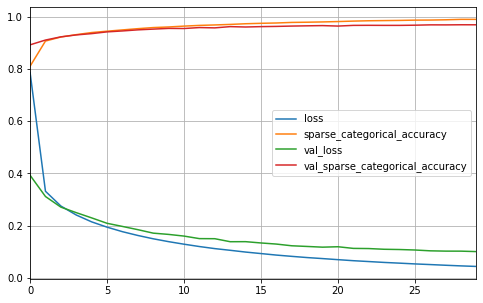

In [88]:
pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [89]:
model.evaluate(X_train,y_train)

33600/33600 [==============================] - 2s 53us/sample - loss: 0.0387 - sparse_categorical_accuracy: 0.9914


[0.03866389851196713, 0.9913988]

In [0]:
y_pred1=model.predict(X_train)

In [0]:
pred1=[]
for i in range(len(y_pred1)):
  pred=np.argmax(y_pred1[i])
  pred1.append(pred)

In [0]:
y_pred1_new=np.asarray(pred1)

In [93]:
y_pred1_new

array([6, 5, 3, ..., 2, 6, 0])

In [0]:
np.savetxt('y_pred1_train.csv', y_pred1_new, delimiter=',')
files.download('y_pred1_train.csv')

In [0]:
y_pred1_test=model.predict(X_test)
pred1_test=[]
for i in range(len(y_pred1_test)):
  pred=np.argmax(y_pred1_test[i])
  pred1_test.append(pred)
y_pred1_test_new=np.asarray(pred1_test)
np.savetxt('y_pred1_test.csv', y_pred1_test_new, delimiter=',')
files.download('y_pred1_test.csv')

In [96]:
cf=confusion_matrix(y_train, y_pred1_new)
cf

array([[3296,    0,    2,    0,    1,    0,    9,    2,    2,    4],
       [   0, 3752,    5,    3,    3,    0,    2,    5,    3,    2],
       [   1,    1, 3310,    2,    1,    1,    2,    7,    4,    2],
       [   0,    5,   13, 3359,    0,   14,    2,    7,    6,    8],
       [   0,    4,    1,    0, 3207,    0,    5,    1,    2,   13],
       [   3,    1,    1,    4,    0, 3073,    6,    0,    2,    3],
       [   5,    0,    0,    0,    4,    3, 3337,    0,    3,    0],
       [   0,   11,    7,    0,    2,    0,    2, 3475,    0,   11],
       [   2,   11,    2,    5,    1,    3,    5,    0, 3190,    9],
       [   6,    0,    1,    2,    9,    4,    0,   11,    5, 3312]])

MODEL #2

In [0]:
img_inputs = keras.Input(shape=(784))
flatten=layers.Flatten()
x=flatten(img_inputs)
x=layers.Dense(200, activation='relu')(x)
x=layers.Dense(200, activation='relu')(x)

In [0]:
outputs = layers.Dense(10, activation='softmax')(x)

In [0]:
model = keras.Model(inputs=img_inputs, outputs=outputs)

In [100]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_10 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer="sgd", metrics=[keras.metrics.sparse_categorical_accuracy])

In [102]:
%time history2=model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid))

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 3s 92us/sample - loss: 0.7596 - sparse_categorical_accuracy: 0.8165 - val_loss: 0.3944 - val_sparse_categorical_accuracy: 0.8901
Epoch 2/30
33600/33600 [==============================] - 3s 83us/sample - loss: 0.3333 - sparse_categorical_accuracy: 0.9051 - val_loss: 0.3139 - val_sparse_categorical_accuracy: 0.9101
Epoch 3/30
33600/33600 [==============================] - 3s 81us/sample - loss: 0.2783 - sparse_categorical_accuracy: 0.9205 - val_loss: 0.2729 - val_sparse_categorical_accuracy: 0.9202
Epoch 4/30
33600/33600 [==============================] - 3s 85us/sample - loss: 0.2442 - sparse_categorical_accuracy: 0.9304 - val_loss: 0.2516 - val_sparse_categorical_accuracy: 0.9276
Epoch 5/30
33600/33600 [==============================] - 3s 83us/sample - loss: 0.2179 - sparse_categorical_accuracy: 0.9376 - val_loss: 0.2302 - val_sparse_categorical_accuracy: 0.9323
Epoch 6/30
33600

In [103]:
history2.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 30,
 'metrics': ['loss',
  'sparse_categorical_accuracy',
  'val_loss',
  'val_sparse_categorical_accuracy'],
 'samples': 33600,
 'steps': 1050,
 'verbose': 0}

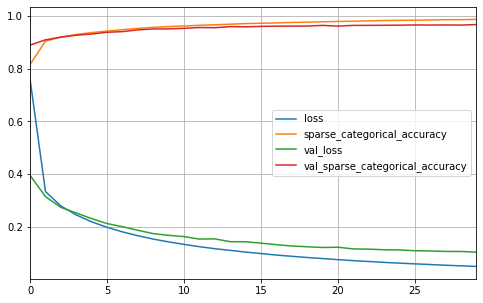

In [104]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [105]:
model.evaluate(X_train, y_train)

33600/33600 [==============================] - 2s 55us/sample - loss: 0.0434 - sparse_categorical_accuracy: 0.9896


[0.043426986709292535, 0.9895536]

In [0]:
y_pred2=model.predict(X_train)

In [0]:
pred2=[]
for i in range(len(y_pred2)):
  pred=np.argmax(y_pred2[i])
  pred2.append(pred)

In [0]:
y_pred2_new=np.asarray(pred2)

In [0]:
np.savetxt('y_pred2_train.csv', y_pred2_new, delimiter=',')
files.download('y_pred2_train.csv')

In [0]:
y_pred2_test=model.predict(X_test)
pred2_test=[]
for i in range(len(y_pred2_test)):
  pred=np.argmax(y_pred2_test[i])
  pred2_test.append(pred)
y_pred2_test_new=np.asarray(pred2_test)
np.savetxt('y_pred2_test.csv', y_pred2_test_new, delimiter=',')
files.download('y_pred2_test.csv')

In [112]:
cf=confusion_matrix(y_train, y_pred2_new)
cf

array([[3286,    0,    2,    1,    1,    2,   13,    2,    5,    4],
       [   0, 3742,    7,    4,    2,    0,    2,    7,    8,    3],
       [   1,    4, 3303,    3,    1,    0,    1,    9,    7,    2],
       [   2,    3,   12, 3361,    0,   13,    1,    7,    5,   10],
       [   0,    6,    2,    0, 3195,    0,    6,    1,    1,   22],
       [   2,    1,    0,    6,    0, 3068,    7,    1,    5,    3],
       [   5,    2,    0,    0,    6,    3, 3333,    0,    3,    0],
       [   1,   14,   10,    0,    3,    0,    2, 3468,    0,   10],
       [   2,    9,    4,    7,    1,    3,    8,    1, 3185,    8],
       [   5,    0,    0,    2,   14,    5,    0,   13,    3, 3308]])

MODEL #3

In [0]:
img_inputs = keras.Input(shape=(784))
flatten=layers.Flatten()
x=flatten(img_inputs)
x=layers.Dense(200, activation='relu')(x)
x=layers.Dense(200, activation='relu')(x)
x=layers.Dense(200, activation='relu')(x)
x=layers.Dense(200, activation='relu')(x)

In [0]:
outputs = layers.Dense(10, activation='softmax')(x)

In [0]:
model = keras.Model(inputs=img_inputs, outputs=outputs)

In [116]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_13 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_14 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_15 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                2010

In [0]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer="sgd", metrics=[keras.metrics.sparse_categorical_accuracy])

In [118]:
%time history3=model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid))

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 3s 93us/sample - loss: 0.9425 - sparse_categorical_accuracy: 0.7373 - val_loss: 0.4063 - val_sparse_categorical_accuracy: 0.8804
Epoch 2/30
33600/33600 [==============================] - 3s 86us/sample - loss: 0.3193 - sparse_categorical_accuracy: 0.9045 - val_loss: 0.2887 - val_sparse_categorical_accuracy: 0.9167
Epoch 3/30
33600/33600 [==============================] - 3s 90us/sample - loss: 0.2486 - sparse_categorical_accuracy: 0.9273 - val_loss: 0.2317 - val_sparse_categorical_accuracy: 0.9342
Epoch 4/30
33600/33600 [==============================] - 3s 84us/sample - loss: 0.2036 - sparse_categorical_accuracy: 0.9413 - val_loss: 0.2205 - val_sparse_categorical_accuracy: 0.9358
Epoch 5/30
33600/33600 [==============================] - 3s 85us/sample - loss: 0.1715 - sparse_categorical_accuracy: 0.9489 - val_loss: 0.1884 - val_sparse_categorical_accuracy: 0.9455
Epoch 6/30
33600

In [119]:
history3.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 30,
 'metrics': ['loss',
  'sparse_categorical_accuracy',
  'val_loss',
  'val_sparse_categorical_accuracy'],
 'samples': 33600,
 'steps': 1050,
 'verbose': 0}

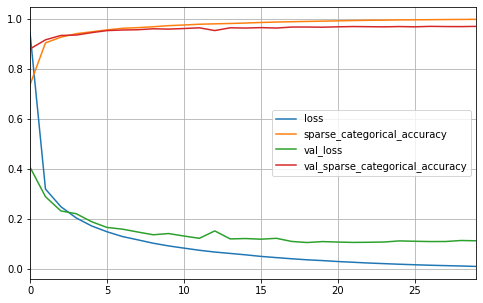

In [120]:
pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [121]:
model.evaluate(X_train,y_train)

33600/33600 [==============================] - 2s 55us/sample - loss: 0.0071 - sparse_categorical_accuracy: 0.9994


[0.007144338634603801, 0.9994048]

In [0]:
y_pred3=model.predict(X_train)

In [0]:
pred3=[]
for i in range(len(y_pred3)):
  pred=np.argmax(y_pred3[i])
  pred3.append(pred)

In [0]:
y_pred3_new=np.asarray(pred3)

In [0]:
np.savetxt('y_pred3_train.csv', y_pred3_new, delimiter=',')
files.download('y_pred3_train.csv')

In [0]:
y_pred3_test=model.predict(X_test)
pred3_test=[]
for i in range(len(y_pred3_test)):
  pred=np.argmax(y_pred3_test[i])
  pred3_test.append(pred)
y_pred3_test_new=np.asarray(pred3_test)
np.savetxt('y_pred3_test.csv', y_pred3_test_new, delimiter=',')
files.download('y_pred3_test.csv')

In [127]:
cf=confusion_matrix(y_train, y_pred3_new)
cf

array([[3316,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 3770,    0,    0,    0,    0,    0,    3,    2,    0],
       [   1,    0, 3329,    0,    0,    0,    0,    1,    0,    0],
       [   0,    0,    0, 3412,    0,    1,    0,    0,    0,    1],
       [   0,    0,    0,    0, 3230,    0,    0,    1,    0,    2],
       [   0,    0,    0,    0,    0, 3093,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 3352,    0,    0,    0],
       [   0,    2,    0,    0,    0,    0,    0, 3505,    0,    1],
       [   0,    0,    1,    0,    0,    0,    1,    0, 3226,    0],
       [   0,    0,    0,    0,    1,    0,    0,    1,    1, 3347]])

MODEL #4

In [0]:
img_inputs = keras.Input(shape=(784))
flatten=layers.Flatten()
x=flatten(img_inputs)
x=layers.Dense(300, activation='relu')(x)
x=layers.Dense(300, activation='relu')(x)
x=layers.Dense(300, activation='relu')(x)
x=layers.Dense(300, activation='relu')(x)

In [0]:
outputs = layers.Dense(10, activation='softmax')(x)

In [0]:
model = keras.Model(inputs=img_inputs, outputs=outputs)

In [132]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_22 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_23 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_24 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                3010

In [0]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer="sgd", metrics=[keras.metrics.sparse_categorical_accuracy])

In [134]:
%time history4=model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid))

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 3s 97us/sample - loss: 0.8771 - sparse_categorical_accuracy: 0.7695 - val_loss: 0.3856 - val_sparse_categorical_accuracy: 0.8868
Epoch 2/30
33600/33600 [==============================] - 3s 85us/sample - loss: 0.3061 - sparse_categorical_accuracy: 0.9085 - val_loss: 0.2798 - val_sparse_categorical_accuracy: 0.9181
Epoch 3/30
33600/33600 [==============================] - 3s 87us/sample - loss: 0.2419 - sparse_categorical_accuracy: 0.9290 - val_loss: 0.2254 - val_sparse_categorical_accuracy: 0.9344
Epoch 4/30
33600/33600 [==============================] - 3s 87us/sample - loss: 0.2002 - sparse_categorical_accuracy: 0.9416 - val_loss: 0.2069 - val_sparse_categorical_accuracy: 0.9393
Epoch 5/30
33600/33600 [==============================] - 3s 86us/sample - loss: 0.1685 - sparse_categorical_accuracy: 0.9501 - val_loss: 0.1828 - val_sparse_categorical_accuracy: 0.9462
Epoch 6/30
33600

In [135]:
history4.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 30,
 'metrics': ['loss',
  'sparse_categorical_accuracy',
  'val_loss',
  'val_sparse_categorical_accuracy'],
 'samples': 33600,
 'steps': 1050,
 'verbose': 0}

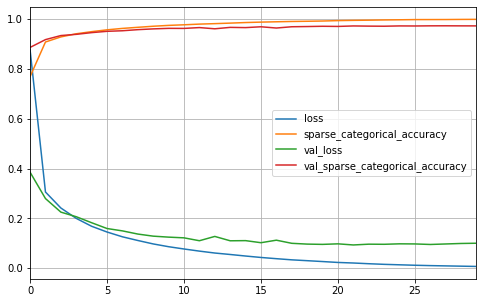

In [136]:
pd.DataFrame(history4.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [137]:
model.evaluate(X_train,y_train)

33600/33600 [==============================] - 2s 57us/sample - loss: 0.0060 - sparse_categorical_accuracy: 0.9996


[0.005966488992886471, 0.9996131]

In [0]:
y_pred4=model.predict(X_train)

In [0]:
pred4=[]
for i in range(len(y_pred4)):
  pred=np.argmax(y_pred4[i])
  pred4.append(pred)

In [0]:
y_pred4_new=np.asarray(pred4)

In [0]:
np.savetxt('y_pred4_train.csv', y_pred4_new, delimiter=',')
files.download('y_pred4_train.csv')

In [0]:
y_pred4_test=model.predict(X_test)
pred4_test=[]
for i in range(len(y_pred4_test)):
  pred=np.argmax(y_pred4_test[i])
  pred4_test.append(pred)
y_pred4_test_new=np.asarray(pred4_test)
np.savetxt('y_pred4_test.csv', y_pred4_test_new, delimiter=',')
files.download('y_pred4_test.csv')

In [0]:
cf=confusion_matrix(y_train, y_pred4_new)

In [144]:
cf

array([[3314,    0,    0,    0,    0,    0,    0,    0,    0,    2],
       [   0, 3771,    0,    0,    1,    0,    0,    1,    1,    1],
       [   0,    0, 3330,    0,    0,    0,    0,    1,    0,    0],
       [   0,    0,    0, 3412,    0,    0,    0,    0,    1,    1],
       [   0,    0,    0,    0, 3232,    0,    0,    1,    0,    0],
       [   0,    0,    0,    0,    0, 3093,    0,    0,    0,    0],
       [   0,    0,    0,    0,    1,    0, 3351,    0,    0,    0],
       [   0,    0,    0,    0,    1,    0,    0, 3507,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 3228,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    1, 3349]])